# FeedForward NN Results

In [39]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Number of worker nodes
n_workers = 8

# Hyperparameters H
buffer_len = 50
mini_batch_size = 25
epochs = 5
lrs_inv = [2048, 4096, 8192]

# Number of runs
n_runs = 100

## Load the saved results

In [43]:
# MNIST
try:
    with open("out/full_network/mnist_8.pkl", "rb") as f:
        res_mnist_fn = pickle.load(f)
        print("Full-network mnist results file loaded")
except FileNotFoundError:
    print("Full-network mnist results file NOT found")

try:
    with open("out/single_layers/mnist_8.pkl", "rb") as f:
        res_mnist_sl = pickle.load(f)
        print("Single-layer fmnist results file loaded")
except FileNotFoundError:
    print("Single-layer fmnist results file NOT found")

# Fashion MNIST
try:
    with open("out/full_network/fmnist_8.pkl", "rb") as f:
        res_fmnist_fn = pickle.load(f)
        print("Full-network fmnist results file loaded")
except FileNotFoundError:
    print("Full-network fmnist results file NOT found")

try:
    with open("out/single_layers/fmnist_8.pkl", "rb") as f:
        res_fmnist_sl = pickle.load(f)
        print("Single-layer fmnist results file loaded")
except FileNotFoundError:
    print("Single-layer fmnist results file NOT found")

Full-network mnist results file loaded
Single-layer fmnist results file loaded
Full-network fmnist results file loaded
Single-layer fmnist results file loaded


## Plots

### Prepare the data

In [44]:
def prepare_results(res_sl, res_fn):
    acc_max_sl = {}
    acc_max_fn = {}
    for lr_inv in lrs_inv:
        acc_max_sl[lr_inv] = [np.max(res_sl[lr_inv][0][i]) for i in range(n_runs)]
        acc_max_fn[lr_inv] = [np.max(res_fn[lr_inv][0][i]) for i in range(n_runs)]

    # Prepare data for plotting
    df = pd.DataFrame(columns=['lr', 'acc', 'workers'])
    for lr_inv in lrs_inv:
        df = pd.concat([df, pd.DataFrame({'lr': lr_inv, 'acc': acc_max_sl[lr_inv], 'Implementation': 'Single-layer'})], ignore_index=True)
        df = pd.concat([df, pd.DataFrame({'lr': lr_inv, 'acc': acc_max_fn[lr_inv], 'Implementation': 'Full-network'})], ignore_index=True)
    
    return df

### Plot the results

#### MNIST

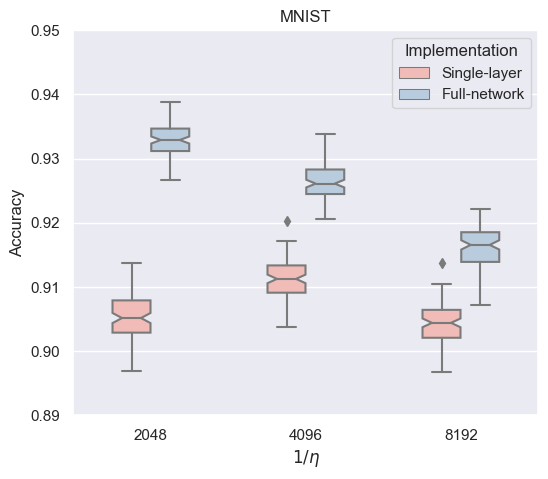

In [45]:
fig = plt.figure(figsize=(6,5))
sns.set(style="darkgrid")

df_mnist = prepare_results(res_mnist_sl, res_mnist_fn)

# Grouped violinplot
ax = sns.boxplot(data=df_mnist, x='lr', y='acc', hue=r"Implementation", palette="Pastel1", notch=True, width=0.5)
ax.set_title("MNIST")
ax.set(ylabel='Accuracy', xlabel=r"$1/\eta$")
ax.set_ylim([0.89, 0.95])
plt.show()

#### Fashion MNIST

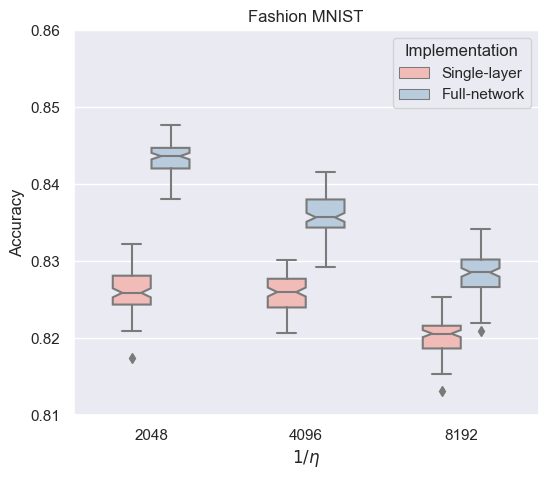

In [46]:
fig = plt.figure(figsize=(6,5))
sns.set(style="darkgrid")

df_fmnist = prepare_results(res_fmnist_sl, res_fmnist_fn)

# Grouped violinplot
ax = sns.boxplot(data=df_fmnist, x='lr', y='acc', hue=r"Implementation", palette="Pastel1", notch=True, width=0.5)
ax.set_title("Fashion MNIST")
ax.set(ylabel='Accuracy', xlabel=r"$1/\eta$")
ax.set_ylim([0.81, 0.86])
plt.show()